In [45]:
##LIBRERIAS REDES NEURONALES CONVOLUCIONALES
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout,MaxPooling2D,Flatten,Dense
################################################################################


##DATA
from tensorflow.keras.datasets import fashion_mnist
########################################################################

##LIBRERIAS PARA TRATAMIENTO GRAFICO Y MATEMATICO
import numpy as np
import matplotlib.pyplot as plt
###########################################################################

In [46]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""

DESCARGAMOS LA INFORMACIÓN A NUESTRA NOTEBOOK

"""

'\n\nDESCARGAMOS LA INFORMACIÓN A NUESTRA NOTEBOOK\n\n'

In [47]:
### REALIZAREMOS ANALISIS EXPLORATORIO
train_images.shape ###TENEMOS 60000 IMAGENES REPRESENTADAS EN UNA MATRIZ DE 28,28 QUE SERIAN PIXELES

(60000, 28, 28)

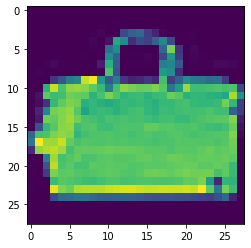

In [48]:
plt.imshow(train_images[99]) ### COMANDO PARA GRAFICAR IMAGENES 
## COMO PODEMOS OBSERVAR ES UN ALMACEN DE ROPA

LIMPIEZA DE DATOS

In [49]:
## AHORA VAMOS A LIMPIAR NUESTROS DATOS

train_images = train_images.astype('float32') / 255 ##CONVERTIMOS EN FLOTANTE PARA QUE LA RED LOS PUEDA TRABAJAR
# MAS FACILMENTE Y SOBRE 255 DEBIDO A QUE LOS PIXELES QUE MANEJAN LAS IMAGENES VAN DE 1 A 255 
test_images = test_images.astype('float32') / 255


"""
EL PRIMER PARAMETRO ES EL CONJUNTO TOTAL DE IMAGENES OSEA 60000,
DESPUES VIENEN LOS 28*28, Y EL ULTIMO 1 SE REFIERE A QUE SOLO ES UN CANAL
YA QUE ESTAMOS TRABAJANDO CON ESCALA DE GRISES, SINO SERIAN 3 CANALES AL ADMITIR LOS DEMAS COLORES.
"""
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)## TENGO SOLO 10 POSIBLES OPCIONES 
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
"""

COMO ESTAMOS TRABAJANDO EN CATEGORIAS COMO SALIDA, LO MEJOR ES TRABAJARLO DE FORMA VECTORIAL.
EN UN SOLO ARREGLO DE CEROS Y UNOS.

"""

'\n\nCOMO ESTAMOS TRABAJANDO EN CATEGORIAS COMO SALIDA, LO MEJOR ES TRABAJARLO DE FORMA VECTORIAL.\nEN UN SOLO ARREGLO DE CEROS Y UNOS.\n\n'

AHORA VAMOS A CREAR NUESTRO MODELO DE DATOS

In [50]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
"""
PARAMETROS IMPORTANTES EN UNA RED CONVOLUCIONAL, PRIMERO ESTA GENERALMENTE ES LA RED DE ENTRADA, 
AQUI TENEMOS:
filter{int} : NUMERO DEL FILTRO
kernel_size{int}
input_shape=(COMO VOY A RECIBIR LOS DATOS POR EJEMPLAR, NO EN CONJUNTO POR ESO SERIA MATRIZ DE 28,28 DE UN SOLO
CANAL)
"""
### AHORA APILAMOS CAPAS
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3)) ## REDUCIR OVERFITTING
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())## APLANA LA MATRIZ O TENSORES PARA QUE QUEDENE EN SERIE
## Y YA CON VECTORES PLANOS, YA PUEDO UTILIZAR CAPAS DENSAS COMO VENIAMOS TRAJABAJANDO ANTES

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) ## 10 PORQUE SON 10 OPCIONES
## DE TIPO SOFTMAX LA DE SALIDA PORQUE ME DA LA PROBABILIDAD PARA CADA CLASE
## SUMANDOLAS ME DA UNO ENTONCES ESCOJO LA DE MAYOR PROBABILIDAD
# Take a look at the model summary
model.summary()




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

COMPILAR-ENTRENAR

In [51]:
### COMPILAMOS EL MODELO
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy']) ### CATEGORICAL_CROSSENTROPY DEBIDO A QUE ESTAMOS EN UN MODELO DE CLASIFICACIÓN

## ADEMAS EXISTEN MULTIPLES OPCIONES, POR LO TANTO CATEGORICAL ES IDEAL
## SI FUERAN SOLO 2 SERIAS BINARY CROSSENTROPY

In [52]:

model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10)

Epoch 1/10
938/938 [==============================] - 107s 111ms/step - loss: 0.5741 - accuracy: 0.7904
Epoch 2/10
938/938 [==============================] - 104s 111ms/step - loss: 0.3933 - accuracy: 0.8595
Epoch 3/10
938/938 [==============================] - 110s 117ms/step - loss: 0.3525 - accuracy: 0.8741
Epoch 4/10
938/938 [==============================] - 86s 92ms/step - loss: 0.3332 - accuracy: 0.8798
Epoch 5/10
938/938 [==============================] - 85s 90ms/step - loss: 0.3257 - accuracy: 0.8855
Epoch 6/10
938/938 [==============================] - 90s 96ms/step - loss: 0.3166 - accuracy: 0.8886
Epoch 7/10
938/938 [==============================] - 109s 116ms/step - loss: 0.3148 - accuracy: 0.8888
Epoch 8/10
938/938 [==============================] - 94s 100ms/step - loss: 0.3109 - accuracy: 0.8906
Epoch 9/10
938/938 [==============================] - 84s 89ms/step - loss: 0.3131 - accuracy: 0.8914
Epoch 10/10
938/938 [==============================] - 103s 110ms/step - 

In [53]:
score = model.evaluate(test_images, test_labels, verbose=0)
score

[0.3219927251338959, 0.8867999911308289]